# Predict occurences of fraud

# Load and take a look at the data

In [100]:
# Load relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Load data
ds=pd.read_csv('Automobile_insurance_fraud.csv')

In [102]:
ds.head(30)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [103]:
ds.shape

(1000, 40)

In [104]:
ds.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Check and treat null values

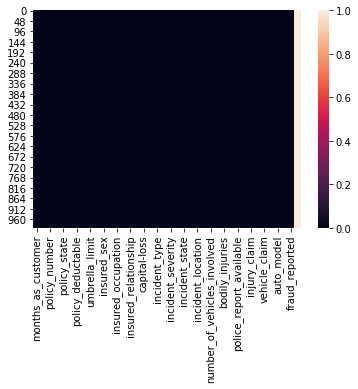

In [105]:
sns.heatmap(ds.isnull())

No null values but there are unknown values in the property_damage, collision_type and police_report columns.

# Replace unknown values with the most common value per column

In [106]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [107]:
# count the amounts of given entries in a column
ds['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

Checked the y/n rows separately and there is no distinguishable way to assign different values to the unknown values. Will encode it as it is so that the unknown value becomes a separate variable.

In [108]:
# count the amounts of given entries in a column
ds['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

Checked the y/n rows separately and there is no distinguishable way to assign different values to the unknown values. Will encode it as it is so that the unknown value becomes a separate variable.

In [109]:
# count the amounts of given entries in a column
ds['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

Checked the y/n rows separately and there is no distinguishable way to assign different values to the unknown values. Will encode it as it is so that the unknown value becomes a separate variable.

Split dataset and check again

# Check correlation

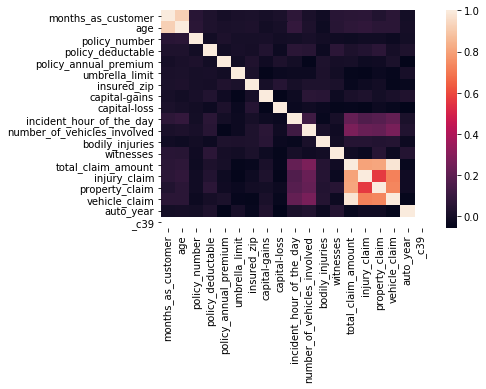

In [110]:
dscor=ds.corr()
sns.heatmap(dscor)

Possibility of using PCA, will check again after encoding.

# Summary statistics

In [111]:
ds.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# Data visualizations

In [112]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

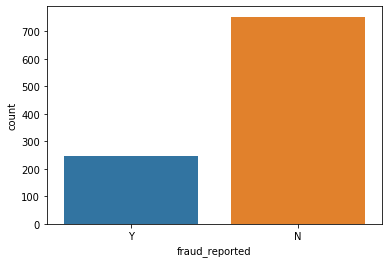

In [113]:
# Show amounts of fraudulent vs non-fraudulent incidents reported
sns.countplot(ds['fraud_reported'])

Incidents of reported fraud are roughly 1:3 fraud to non-fraudulent.

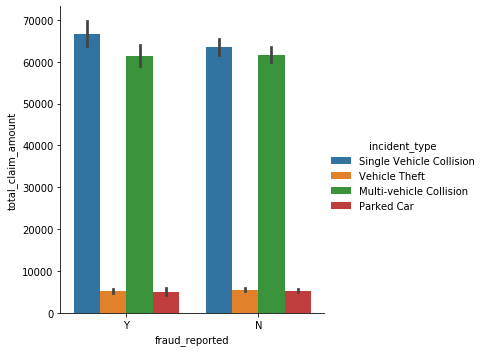

In [114]:
# Show the mean total claims per incident type, grouped by whether it was fraudulent or not.
sns.catplot(x='fraud_reported', y= 'total_claim_amount', hue='incident_type', data=ds, kind='bar')

Single and multiple vehicle collisions are most commonly claimed on and used to attempt fraud.  Single vehicle collisions are most commonly used in the case of fraudulent claims.  

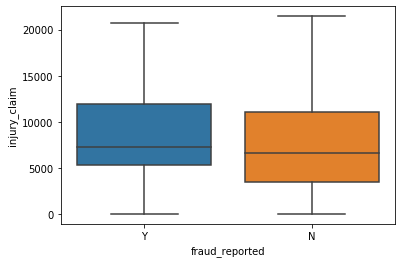

In [115]:
# show boxplots for the spread over injury claims for fraudulent and non-fraudulent claims
sns.boxplot(x='fraud_reported',y='injury_claim',data=ds)

Fraud seems to be more likely in the case of a higher injury claim.

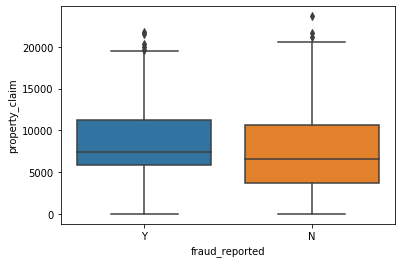

In [116]:
# show boxplots for the spread over property claims for fraudulent and non-fraudulent claims
sns.boxplot(x='fraud_reported',y='property_claim',data=ds)

Instances of fraud are also more common with higher property claims. Real claims have a wider spread. Both contain outliers.

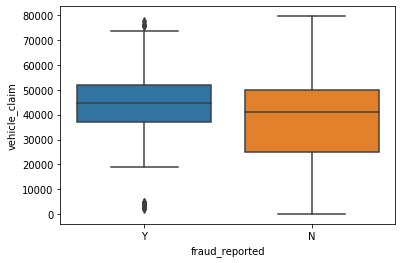

In [117]:
# show boxplots for the spread over vehicle claims for fraudulent and non-fraudulent claims
sns.boxplot(x='fraud_reported',y='vehicle_claim',data=ds)

Fraud is also more common with higher vehicle claims although fraudulent claims have a number of outliers.

# Check eveness of dataset

In [118]:
ds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [119]:
# Count the amounts of variables in the target column
fraud_counts = ds['fraud_reported'].value_counts()
fraud_counts

N    753
Y    247
Name: fraud_reported, dtype: int64

In [120]:
# Percentage of value counts in the target column
fraud_percentage = ds['fraud_reported'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
fraud_percentage

N    75.3%
Y    24.7%
Name: fraud_reported, dtype: object

The data is not distributed evenly over the target column, the accuracy scores of classification models will be affected.

# Encode categorical columns to numeric values

In [121]:
eds=ds

In [122]:
eds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [123]:
eds.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [124]:
# Change categorical data to numerical data for 2 categoriacl columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['policy_bind_date','policy_state', 'policy_csl','insured_sex','insured_education_level', 'insured_occupation', 
      'insured_hobbies','insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city','incident_location', 'property_damage', 
      'police_report_available',  'auto_make','auto_model', 'fraud_reported']
for col in cols:
    eds[col] = le.fit_transform(eds[col])

In [125]:
eds.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,2004,1,NaN
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,2007,1,NaN
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,2007,0,NaN
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,2014,1,NaN
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,2009,0,NaN


# Check correlation after encoding

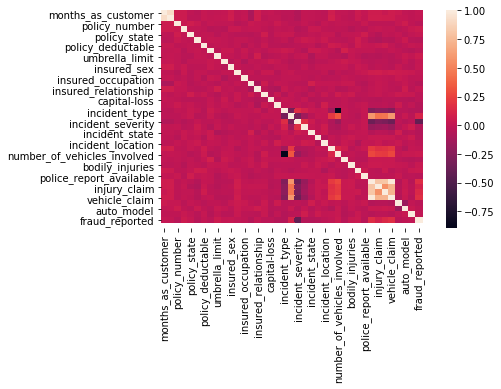

In [126]:
dscor=eds.corr()
sns.heatmap(dscor)

Almost all attributes in the dataset have strong correlation with the target column except incident severity which has a negative correlation with the target column.
And c39 which is an empty column.

# Drop irrelevant columns

In [127]:
eds.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [128]:
# Drop irrelevant (poorly correlated) columns - dataset renamed to nds (new dataset)
nds=eds.drop(columns=['policy_number', '_c39' ])

# Find and remove outliers

In [129]:
nds.shape

(1000, 38)

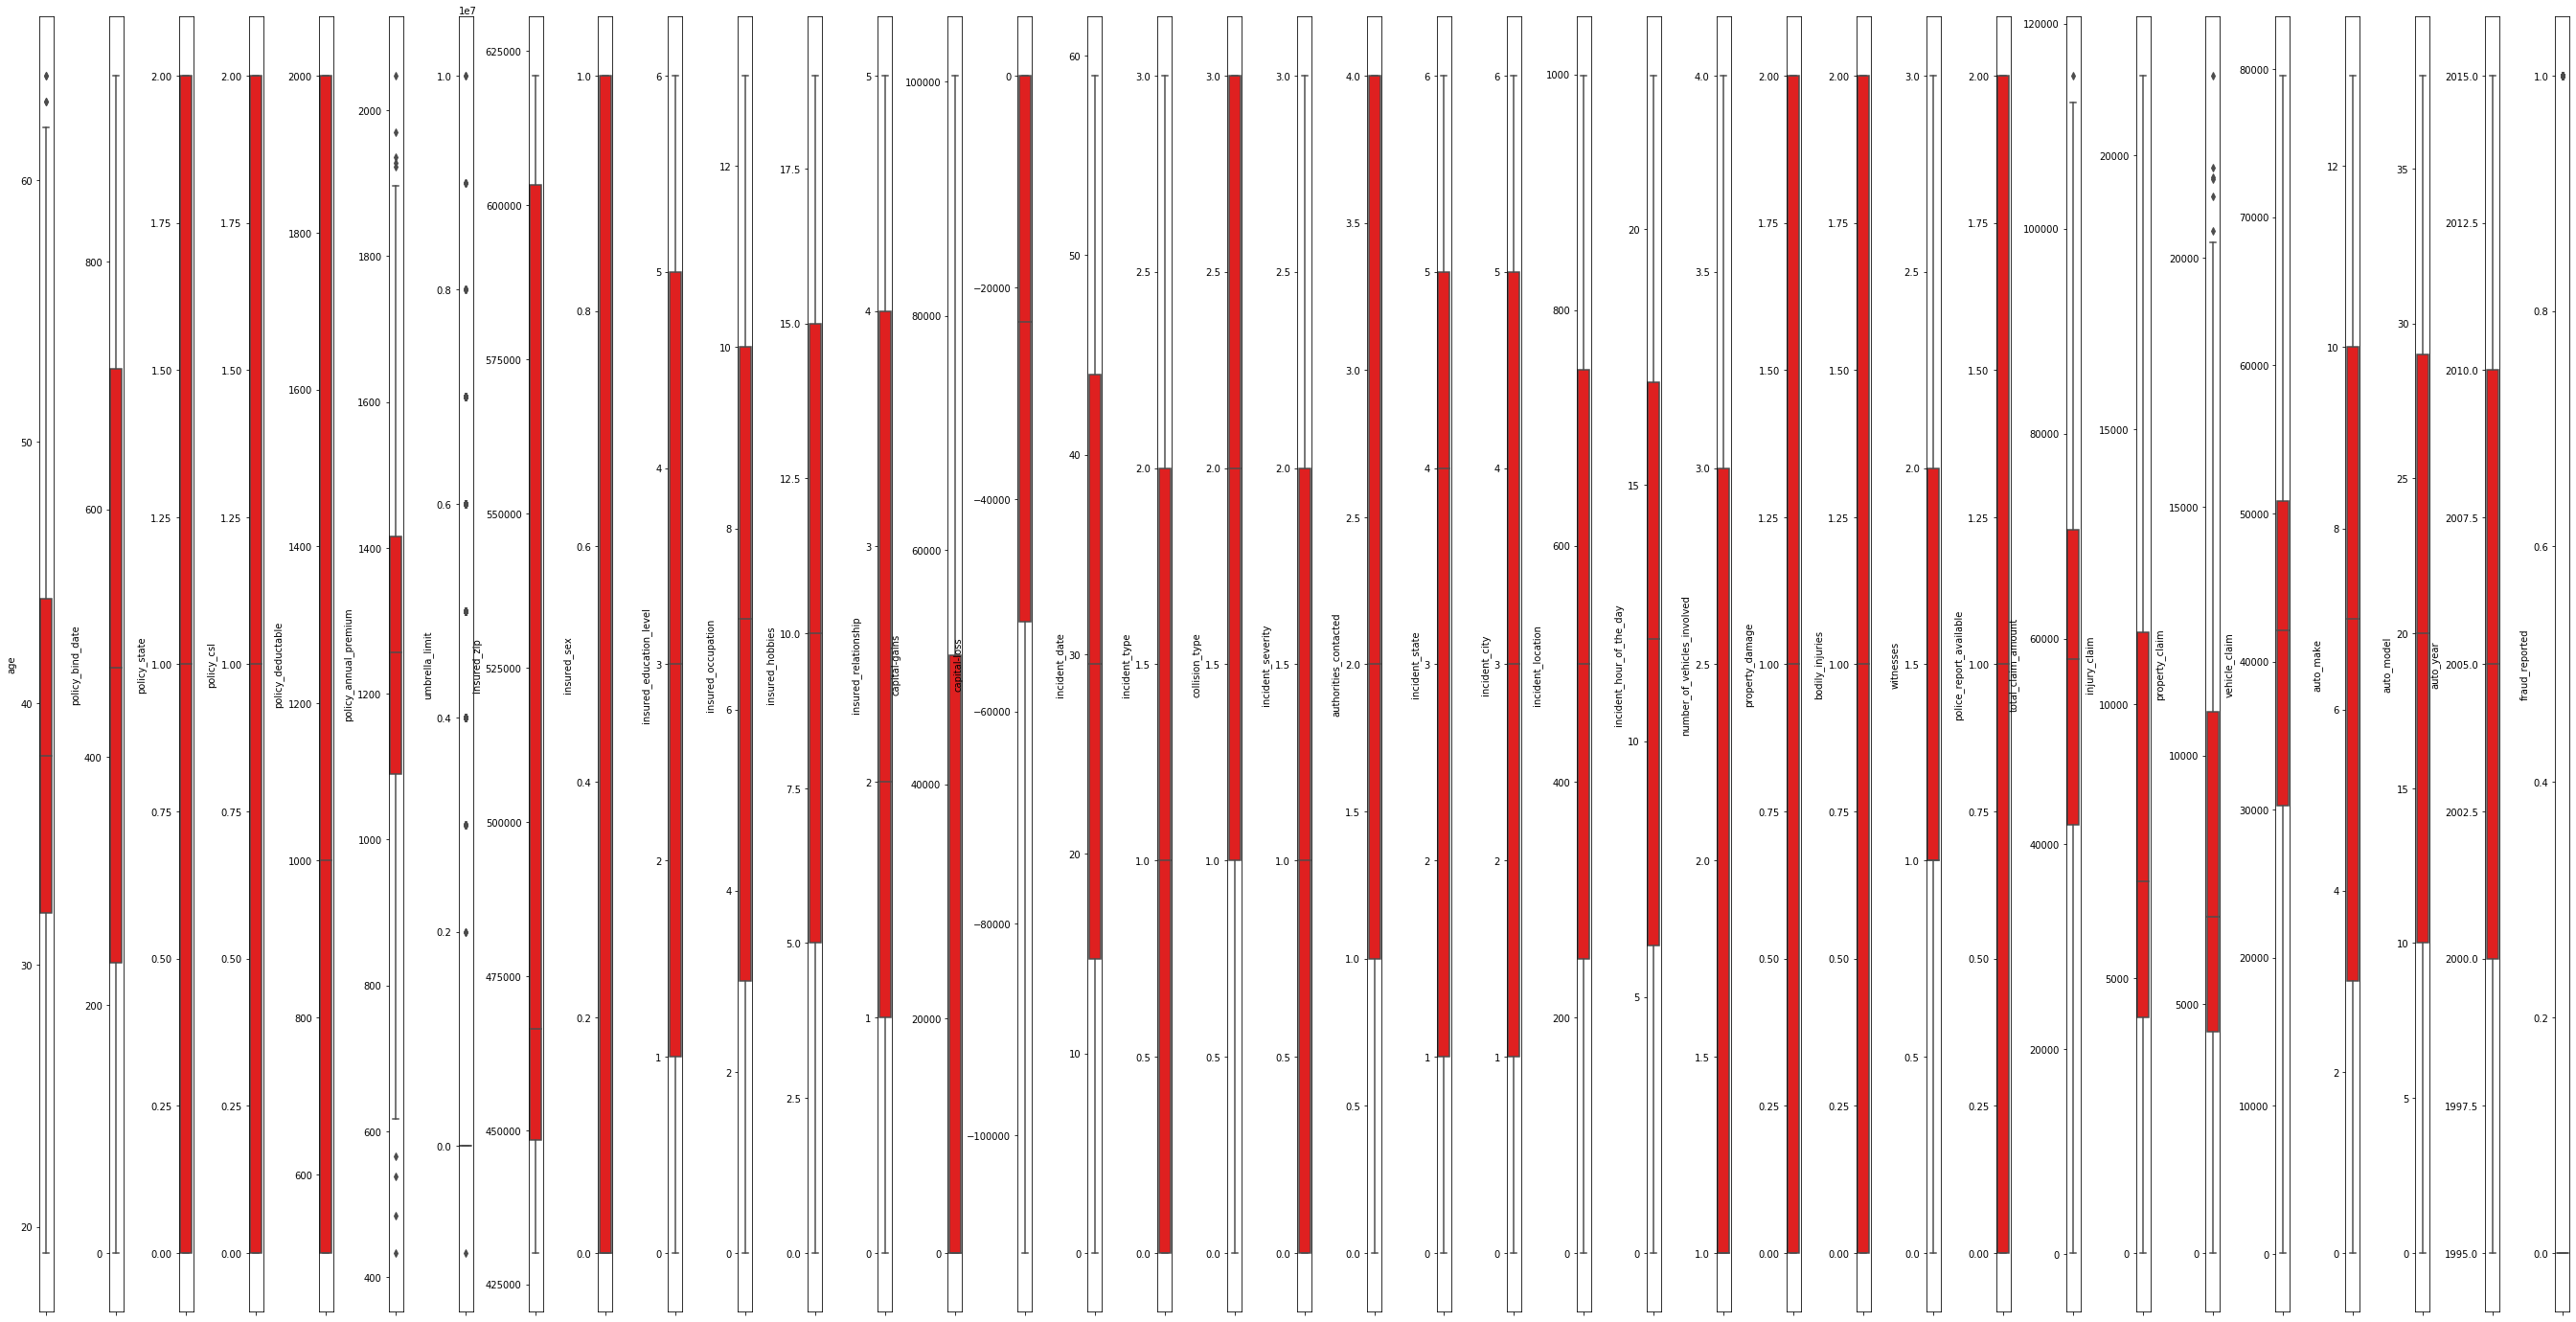

In [130]:
# Show boxplots for all columns, check outliers
collist=nds.columns.values
ncol=38
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(nds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [131]:
# Remove outliers - dataset renamed to cds (clean dataset)
from scipy import stats
from scipy.stats import zscore

z_score=abs(zscore(nds))
print(nds.shape)
cds=nds.loc[(z_score<3).all(axis=1)]
print(cds.shape)

(1000, 38)
(980, 38)


# Check and adjust skewness

# Split data into x and y

In [132]:
cds.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [133]:
# Lineup target and input values
cds_x=cds.drop(columns=['fraud_reported'])
y=cds[['fraud_reported']]

# Apply PCA to reduce the amount of x columns

# Apply scaler

In [134]:
#Scaling for linear regression
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
scx=sc.fit_transform(cds_x)
scx=pd.DataFrame(scx,columns=cds_x.columns)

In [135]:
scx.skew()

months_as_customer             0.362608
age                            0.475385
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280


In [136]:
#Treat skewness using log
for col in scx.columns:
    if scx.skew().loc[col]>0.55:
        scx[col]=np.log1p(scx[col])

In [137]:
scx.skew()

months_as_customer             0.362608
age                            0.475385
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.573675
insured_zip                   -0.403480
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369
incident_hour_of_the_day      -0.039280


# Train-Test split

In [138]:
# Train test split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(scx,y, random_state=55, test_size=0.20,stratify= cds['fraud_reported'])

# Model

In [139]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [140]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [141]:
from sklearn.model_selection import cross_val_score

# Using GridSearchCV to select the best parameter¶

In [142]:
# best parameters for logistic Regression

from sklearn.model_selection import GridSearchCV
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'penalty': 'l2'}

In [143]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [144]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,30)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 30}

In [145]:
# Logistic Regression and binary classification methods

In [146]:
KNN=KNeighborsClassifier(n_neighbors= 30)
LR=LogisticRegression(penalty='l2')
DT=DecisionTreeClassifier(criterion='gini')# check random_state?
GNB=GaussianNB()

In [147]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')



Accuracy score = 0.7551020408163265


cross validation score = 0.7561224489795917


roc_auc_score =  0.5


classification_report
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       148
           1       0.00      0.00      0.00        48

    accuracy                           0.76       196
   macro avg       0.38      0.50      0.43       196
weighted avg       0.57      0.76      0.65       196



[[148   0]
 [ 48   0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



************************* LogisticRegression *************************

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, m

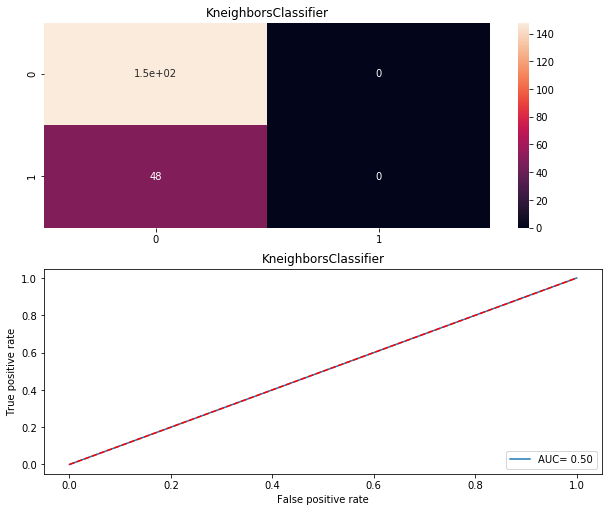

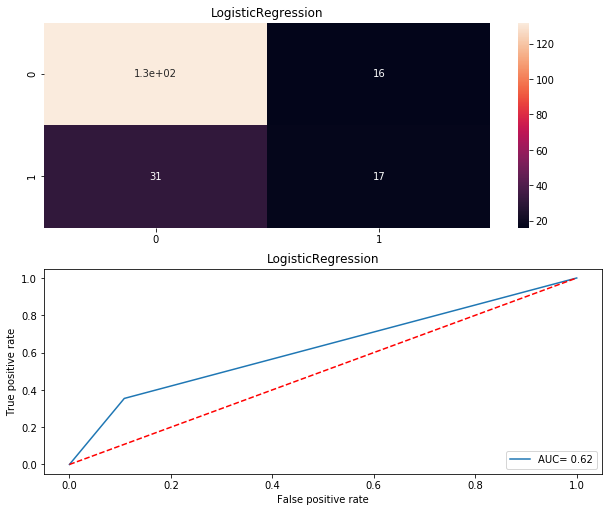

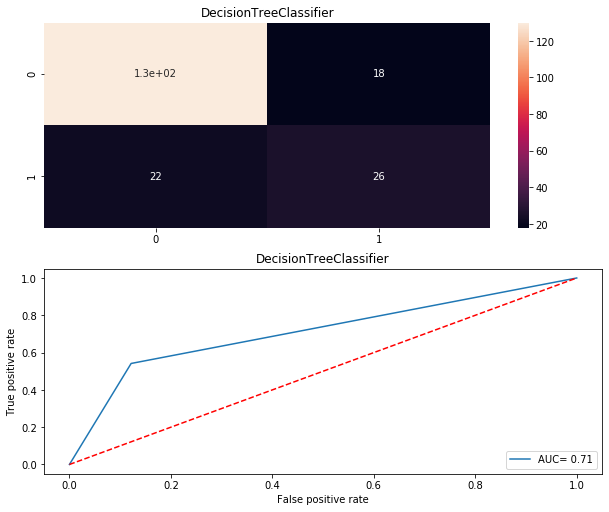

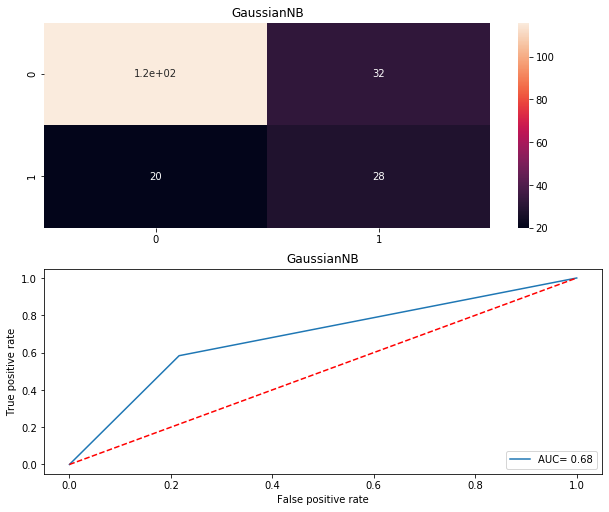

In [158]:
model_list=[]
score=[]
cvs=[]
rocscore=[]

for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,scx,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate, label='AUC= %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    print('\n\n')

In [159]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs,'Roc_auc_score': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_score
0,KneighborsClassifier,75.510204,75.612245,50.000000
1,LogisticRegression,76.020408,77.755102,62.302928
2,DecisionTreeClassifier,79.591837,78.163265,71.002252
3,GaussianNB,73.469388,72.142857,68.355856


In [150]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7857142857142857
[[134  14]
 [ 28  20]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.86       148
           1       0.59      0.42      0.49        48

    accuracy                           0.79       196
   macro avg       0.71      0.66      0.68       196
weighted avg       0.77      0.79      0.77       196



In [151]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier()
#,n_estimators=50,Learning_rate=1.0)
ad= AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7857142857142857
[[128  20]
 [ 22  26]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       148
           1       0.57      0.54      0.55        48

    accuracy                           0.79       196
   macro avg       0.71      0.70      0.71       196
weighted avg       0.78      0.79      0.78       196



In [152]:
# Use Gradient Boosting technique with GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

gbr=GradientBoostingClassifier()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,100,500,1000]}
clf=GridSearchCV(gbr,parameters, cv=5)
clf.fit(scx,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 500}

In [153]:
gbr=GradientBoostingClassifier(learning_rate= 0.01, n_estimators= 500,random_state=42)
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
print(accuracy_score(y_test,predgbr))
print(confusion_matrix(y_test,predgbr))
print(classification_report(y_test,predgbr))

0.8316326530612245
[[128  20]
 [ 13  35]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.89       148
           1       0.64      0.73      0.68        48

    accuracy                           0.83       196
   macro avg       0.77      0.80      0.78       196
weighted avg       0.84      0.83      0.84       196



In [154]:
from sklearn.svm import SVC
# Perform Support Vector Machine classification and check it's accuracy
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7602040816326531
[[148   0]
 [ 47   1]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       148
           1       1.00      0.02      0.04        48

    accuracy                           0.76       196
   macro avg       0.88      0.51      0.45       196
weighted avg       0.82      0.76      0.66       196



I choose the GradientBoostingClassifier model as my final model because it gives the best scores.

Accuracy score = 83.2 Precision = 91.0 Recall = 86.0

# Save the model

In [156]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(gbr,'Fraud.pkl')

['Fraud.pkl']

In [157]:
# Load and use model to make a prediction
model=joblib.load('Fraud.pkl')
model.predict(x_test)

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])